# 5.2 CNN trained with small dataset
In this notebook, we're gonna solve problem of classification dogs vs cats. Dataset has 4000 images, equal for both classes.

## 5.2.2 Load *Dogs vs Cats* dataset
We're gonna load it from Kaggle - it was challange in 2013.

In [1]:
import os, shutil

In [2]:
original_dataset_dir = r"..\data\Dogs vs Cats\Kaggle"
base_dir = r"..\data\Dogs vs Cats\NN Input"

In [3]:
os.path.exists(base_dir)

True

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

In [5]:
def make_dir(parent_dir, name):
    made_dir = os.path.join(parent_dir, name)
    os.mkdir(made_dir)
    return made_dir

In [6]:
train_cats_dir = make_dir(train_dir, 'cats')
train_dogs_dir = make_dir(train_dir, 'dogs')

val_cats_dir = make_dir(val_dir, 'cats')
val_dogs_dir = make_dir(val_dir, 'dogs')

test_cats_dir = make_dir(test_dir, 'cats')
test_dogs_dir = make_dir(test_dir, 'dogs')

In [7]:
def copy_data_to_split(dest_dir, label, ids=range(1000)):
    fnames = ['{}.{}.jpg'.format(label, i) for i in ids]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

In [8]:
copy_data_to_split(train_cats_dir, 'Cat')
copy_data_to_split(train_dogs_dir, 'Dog')

copy_data_to_split(val_cats_dir, 'Cat', range(1000, 1500))
copy_data_to_split(val_dogs_dir, 'Dog', range(1000, 1500))

copy_data_to_split(test_cats_dir, 'Cat', range(1500, 2000))
copy_data_to_split(test_dogs_dir, 'Dog', range(1500, 2000))

In [9]:
print('train cats:', len(os.listdir(train_cats_dir)))

train cats: 1000


In [10]:
print('train dogs:', len(os.listdir(train_dogs_dir)))

train dogs: 1000


## 5.2.3 Prepare CNN

In [11]:
from keras import layers
from keras import models

model = models.Sequential()

In [12]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## 5.2.4 Data preparation

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('Input data shape:', data_batch.shape)
    print('Labels data shape:', labels_batch.shape)
    break

Input data shape: (20, 150, 150, 3)
Labels data shape: (20,)


## 5.2.4 Training

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

c:\users\errry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 61s 596ms/step - loss: 0.6880 - acc: 0.5360 - val_loss: 0.6848 - val_acc: 0.5470
Epoch 2/30
100/100 [==============================] - 75s 755ms/step - loss: 0.6573 - acc: 0.6090 - val_loss: 0.6457 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 66s 661ms/step - loss: 0.6175 - acc: 0.6485 - val_loss: 0.6144 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 67s 675ms/step - loss: 0.5748 - acc: 0.6940 - val_loss: 0.6037 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 68s 683ms/step - loss: 0.5396 - acc: 0.7225 - val_loss: 0.6044 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 60s 596ms/step - loss: 0.5199 - acc: 0.7375 - val_loss: 0.5817 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 60s 603ms/step - loss: 0.4841 - acc: 0.7690 - val_loss: 0.5740 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 6

In [20]:
model.save('dogs_cats_small.h5')

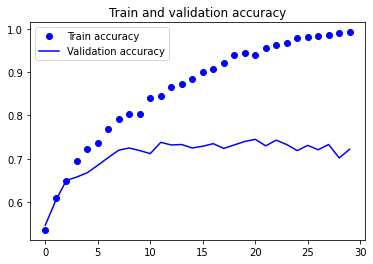

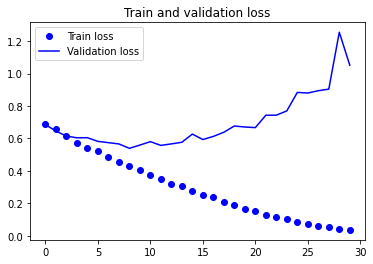

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Train and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Train and validation loss")
plt.legend()

plt.show()

So, plots show that model is overfitted.

## 5.2.5 Data augmentation

In [22]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [24]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

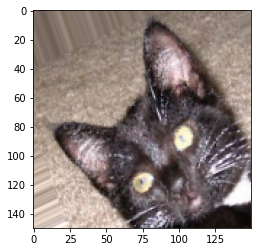

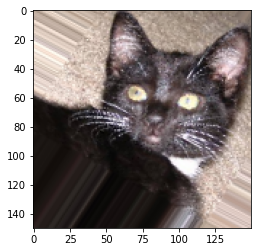

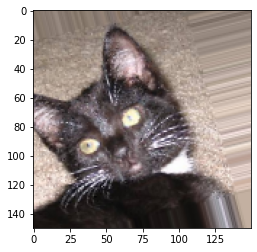

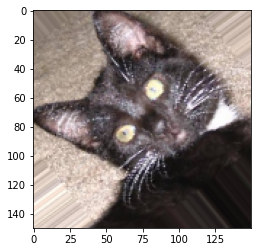

In [25]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

## 5.2.5 Adding dropout

In [27]:
model_dropped = models.Sequential()

model_dropped.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_dropped.add(layers.MaxPooling2D((2, 2)))
model_dropped.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropped.add(layers.MaxPooling2D((2, 2)))
model_dropped.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropped.add(layers.MaxPooling2D((2, 2)))
model_dropped.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropped.add(layers.MaxPooling2D((2, 2)))
model_dropped.add(layers.Flatten())
model_dropped.add(layers.Dropout(0.5)) # Add dropout
model_dropped.add(layers.Dense(512, activation='relu'))
model_dropped.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model_dropped.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

In [30]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history2 = model_dropped.fit_generator(
    train_generator,
    steps_per_epoch=int(2000/32),
    epochs=30,
    validation_data=val_generator,
    validation_steps=int(1000/32))

c:\users\errry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
62/62 [==============================] - 62s 990ms/step - loss: 0.6605 - acc: 0.5971 - val_loss: 0.6586 - val_acc: 0.6104
Epoch 2/30
62/62 [==============================] - 60s 969ms/step - loss: 0.6531 - acc: 0.6189 - val_loss: 0.6233 - val_acc: 0.6438
Epoch 3/30
62/62 [==============================] - 62s 995ms/step - loss: 0.6409 - acc: 0.6265 - val_loss: 0.6472 - val_acc: 0.6396
Epoch 4/30
62/62 [==============================] - 60s 961ms/step - loss: 0.6394 - acc: 0.6428 - val_loss: 0.6131 - val_acc: 0.6521
Epoch 5/30
62/62 [==============================] - 62s 1s/step - loss: 0.6329 - acc: 0.6367 - val_loss: 0.5919 - val_acc: 0.6792
Epoch 6/30
62/62 [==============================] - 61s 976ms/step - loss: 0.6299 - acc: 0.6413 - val_loss: 0.5956 - val_acc: 0.6729
Epoch 7/30
62/62 [==============================] - 63s 1s/step - loss: 0.6047 - acc: 0.6697 - val_loss: 0.6056 - val_acc: 0.6500
Epoch 8/30
62/62 [==============================] - 61s 978ms/step - loss: 

In [37]:
model_dropped.save('dogs_cats_small_2.h5')

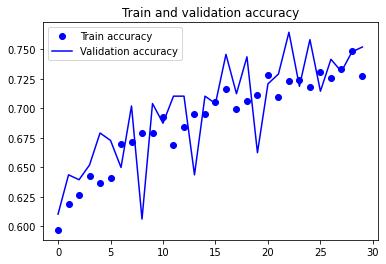

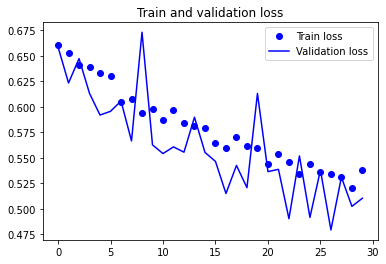

In [38]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Train and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Train and validation loss")
plt.legend()

plt.show()

Model results look much better, train and validation curves are much more similar.